In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy import stats
import pdb
import json
from math import sqrt

In [6]:
file_csv = '/mnt/disk15tb/paula/Main_DA_Projects/data_analysis_output/Primary Neurons/adnp_report_June2024/therapy_combined.csv'

data_df = pd.read_csv(file_csv)

In [7]:
df = data_df.replace(np.NaN,0.0)
df

,Run_ID,DIV,Well,NeuronType,Time,Chip_ID,mean_IBI,cov_IBI,mean_Burst_Peak,cov_Burst_Peak,...,cov_Burst_Peak_Abs,mean_BurstDuration,cov_BurstDuration,MeanNetworkISI,CoVNetworkISI,MeanWithinBurstISI,CoVWithinBurstISI,MeanOutsideBurstISI,CoVOutsideBurstISI,Fanofactor
0,2,7,1,WT,14-Nov-2023 10:50:09,M07295,16.788235,83.066914,3.276032,14.537486,...,10.190418,0.727778,0.0,0.404598,401.000477,0.197656,86.106141,0.260840,75.220229,6.058527
1,2,7,2,WT,14-Nov-2023 10:50:09,M07295,14.094737,75.397553,3.256519,13.824110,...,11.875154,0.605000,0.0,0.425372,379.508019,0.187450,96.223849,0.268088,75.317788,5.405987
2,2,7,3,HET,14-Nov-2023 10:50:09,M07295,0.000000,0.000000,2.672669,0.000000,...,3.510311,0.000000,0.0,0.451830,404.001194,0.000000,0.000000,0.000000,0.000000,1.992995
3,2,7,4,HET,14-Nov-2023 10:50:09,M07295,10.275000,77.569809,3.761621,42.577947,...,29.948934,0.882759,0.0,0.449561,343.741058,0.180487,100.358688,0.279119,74.861456,19.136496
4,2,7,5,HET,14-Nov-2023 10:50:09,M07295,9.957143,68.901213,3.877156,34.375615,...,29.509995,0.948276,0.0,0.462116,340.512274,0.186785,97.310884,0.298210,70.944831,19.244889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,77,21,2,WT,16-Nov-2023 15:35:03,M06815,1.299127,34.461832,9.570007,32.159495,...,46.134215,0.470000,0.0,0.221962,250.103625,0.088630,223.059616,0.172167,136.231220,799.102174
115,77,21,3,WT,16-Nov-2023 15:35:03,M06815,1.294348,42.471014,9.786205,40.644818,...,51.572986,0.770563,0.0,0.179148,255.709101,0.103381,181.833303,0.169876,134.549037,494.016473
116,77,21,4,WT,16-Nov-2023 15:35:03,M06815,1.185657,38.961113,9.548228,32.298671,...,41.723109,0.678175,0.0,0.180963,307.125259,0.104492,189.477994,0.172642,138.306225,480.068257
117,77,21,5,WT,16-Nov-2023 15:35:03,M06815,1.190800,38.673619,8.534600,36.507693,...,46.848804,0.584462,0.0,0.213734,282.549725,0.112418,192.051893,0.189149,127.409682,603.020515


In [8]:
div = df['DIV'].unique()
print(div)

def extract_min_value(div):
    return int(div.split('-')[0])

df['DIV_sort'] = df['DIV'].apply(extract_min_value)
df = df.sort_values(by=['DIV_sort']).reset_index(drop=True)
df = df.drop(columns=['DIV_sort'])
div = df['DIV'].unique()
print(div)

['7' '10-11' '14' '24-25' '27-28' '31-32' '21']
['7' '10-11' '14' '21' '24-25' '27-28' '31-32']


In [9]:
chip_id = df['Chip_ID'].unique()
print(chip_id)

['M07295' 'M06815' 'M07429']


In [10]:
df['NeuronType'] = df['NeuronType'].str.strip()
unique_genotypes = df['NeuronType'].unique()
#unique_genotypes =['WT cortex','HET cortex']
print(unique_genotypes)

['WT' 'HET']


## Without outlier removal

In [ ]:
df.columns

In [ ]:
colors = ['lightblue','royalblue','brown']
markers = ['o','s','d','*','^']

In [ ]:
output_types = ['mean_IBI'
    , 'mean_Burst_Peak',  'Number_Bursts',
       'mean_Spike_per_Burst',
     'mean_BurstDuration']





dirpath = '/srv/network_analysis_outputs/shank3_1_t3/graphs/with_outlier'
for output_type in output_types:
    total_genotypes = len(unique_genotypes)
    #output_type='Number_Bursts'
    # Print the number of unique genotypes
    print(f"Number of unique Genotypes: {total_genotypes}")

    # Initialize output arrays for each unique genotype
    output_arrays = {genotype: [] for genotype in unique_genotypes}
    chip_arrays = {genotype: [] for genotype in unique_genotypes}
    well_arrays = {genotype: [] for genotype in unique_genotypes}
    print(unique_genotypes)
    # Fill data from data frame
    for i in div:
        for genotype in unique_genotypes:
            temp_df = df.loc[(df['DIV'] == i) &
                            (df['NeuronType'].str.strip() == genotype)
                            ]
            output_arrays[genotype].append(np.array(temp_df[output_type]))
            chip_arrays[genotype].append(np.array(temp_df['Chip_ID']))
            well_arrays[genotype].append(np.array(temp_df['Well']))
    #print(df)
    # Adjust bar width and gap between them
    bar_width = 0.25  # Adjust as necessary for your specific plot
    gap_between_bars = 0  # Adjust the gap between bars within a group

    # Calculate the total width for all bars in a group
    total_bar_group_width = total_genotypes * bar_width + (total_genotypes - 1) * gap_between_bars

    # Create x-coordinates of bars for each genotype group
    x_genotype = {genotype: [] for genotype in unique_genotypes}
    base_x_coordinate = np.arange(len(div))  # Base x-coordinates for each group
    offset = (total_genotypes * bar_width + (total_genotypes - 1) * gap_between_bars) / 2
    centered_x = base_x_coordinate - offset + bar_width / 2
    for i, genotype in enumerate(unique_genotypes):
        x_genotype[genotype] = centered_x + i * (bar_width + gap_between_bars)



    # Initialize plot
    fig, ax = plt.subplots()
    # Generate a list of distinct colors based on the number of genotypes
    #colors = [plt.colormaps['Set1'](i) for i in np.linspace(0, 1, len(unique_genotypes))]# Using a colormap to generate colors
    #colors2 = [plt.colormaps['Set2'](i) for i in np.linspace(0, 1, len(unique_genotypes))]#
    # marker_shapes = ['^', 's', 'v', 'D', '+', 'x', '*', 'H', '8']
    # marker_chips={chip:marker_shapes[idx] for idx, chip in enumerate(track_chips)}
    # Plot data for each genotype
    mean_data_all ={}
    yerr_data_all = {}
    n_data_all={}
    #breakpoint()
    #pdb.set_trace()
    for i,genotype in enumerate(unique_genotypes):
        #breakpoint()
        y_data = output_arrays[genotype]
        chipy_data = chip_arrays[genotype]
        welly_data = well_arrays[genotype]
        #print("type: ",type(genotype))
        # Calculate statistics
        mean_data = [np.mean([n for n in yi if np.isfinite(n)]) for yi in y_data]
        yerr_data = [np.std([n for n in yi if np.isfinite(n)], ddof=1)/np.sqrt(np.size(yi)) for yi in y_data]
        n_data = [len(yi) for yi in y_data]
        # Store statistics in dictionaries
        mean_data_all[genotype] = mean_data
        yerr_data_all[genotype] = yerr_data
        n_data_all[genotype] = n_data
        
            
        # Plot bars
        #transparency value 
        alpha_value = 0.5
        ax.bar(x_genotype[genotype], mean_data, yerr=yerr_data, capsize=3, width=bar_width, color=colors[i], edgecolor='black', ecolor='black', label=genotype,alpha=0.6)

        #pdb.set_trace()
        # Plot scatter points
        #breakpoint()
        for j in range(len(x_genotype[genotype])):
            #pdb.set_trace()
            # ax.scatter(x_genotype[genotype][j] + np.zeros(y_data[j].size), y_data[j], s=20,color=colors2[i],marker=marker_chips[chipy_data[j]+str(welly_data[j])] if chipy_data[j]+str(welly_data[j]) in track_chips else 'o')
    # Concatenate corresponding elements from chipy_data[j] and welly_data[j]
            combined_data = [str(chip)+ str(well) for chip, well in zip(chipy_data[j], welly_data[j])]

            # # Check if the concatenated string is in track_chips, and set the marker accordingly
            # markers = [marker_chips.get(chipwell, 'o') for chipwell in combined_data]
            # #marker_chips[combined_data[0]] if combined_data[0] in track_chips else 'o'

            # Use the marker in the scatter plot
            jitter_amount=0.07
            for k in range(len(y_data[j])):
                #pdb.set_trace()
                ax.scatter(
                    x_genotype[genotype][j] + np.random.uniform(-jitter_amount, jitter_amount, 1),
                    y_data[j][k],
                    s=10,
                    color=colors[i],
                    marker=markers[i]
                        )


    # # Calculate maximum y-value for plotting significance
    # max_y = max([max(data) for data in output_arrays.values() if data.size > 0])
    # increment = max_y * 0.1  # Increment to adjust y-position for significance markers

    #Perform and plot t-tests between all pairs of genotype
    #pdb.set_trace()
    for i in range(len(base_x_coordinate)):
        #maxim = max([max( output_arrays[genotype][i] )for genotype in unique_genotypes])
        maxim = max(max(array) for genotype_arrays in output_arrays.values() for array in genotype_arrays)
        count = 1
        p_values = []
        for j, genotype1 in enumerate(unique_genotypes):
            for k, genotype2 in enumerate(unique_genotypes):
                if j < k:
                    #pdb.set_trace()
                    #print("mean_data_all",mean_data_all[genotype1])
                    #print("type:",type(genotype1))
                    mean1, sem1, n1 = mean_data_all[genotype1][i], yerr_data_all[genotype1][i], n_data_all[genotype1][i]
                    mean2, sem2, n2 = mean_data_all[genotype2][i], yerr_data_all[genotype2][i], n_data_all[genotype2][i]
                    #t_stat, p_value = stats.ttest_ind_from_stats(mean1, sem1, n1, mean2, sem2, n2)
                    sed = sqrt(sem1**2.0 + sem2**2.0)
                    t_stat = (mean1 - mean2) / sed
                    # degrees of freedom
                    degreef = n1+n2 - 2
                    alpha=0.05
                    # calculate the critical value
                    cv = stats.t.ppf(1.0 - alpha, degreef)
                    # calculate the p-vallue
                    p_value = (1.0 - stats.t.cdf(abs(t_stat), degreef)) * 2.0
                    p_values.append([mean1,sem1,mean2,sem2,p_value])

                    # Plot significance
                    #maxim = max(np.max(output_arrays[genotype1][i]), np.max(output_arrays[genotype2][i]))
                    x1, x2 = x_genotype[genotype1][i], x_genotype[genotype2][i]
                    
                    sign = "***" if p_value <= 0.001 else "**" if p_value <= 0.01 else "*" if p_value <= 0.05 else "ns"
                    if not sign =='ns':
                        ax.plot([x1, x2], [maxim + 0.05*maxim*(count)] * 2, 'k', linewidth=1.5)
                        ax.text((x1 + x2) / 2, maxim +0.05*maxim*(count), sign, ha='center', va='bottom', fontsize=7)
                        ax.axvline(x1,color='black',linestyle=':',linewidth=0.5)
                        ax.axvline(x2,color='black',linestyle=':',linewidth=0.5)
                    count = count +1

                    


   # Adjustments for plot aesthetics
    plt.title(f"{output_type}", fontsize=14)
    plt.xlabel('DIV', fontsize=12)
    plt.ylabel(f"{output_type}", fontsize=12)
    plt.xticks(base_x_coordinate, div, fontsize=10)
    plt.legend(title='NeuronType', loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
    plt.tight_layout()  # Adjust layout to prevent clipping of ylabel
    #plt.legend(title='NeuronType',loc='upper right', fontsize='x-small', handlelength=2, handletextpad=2, handleheight=2,bbox_to_anchor=(1.0, 1))
    import os 
    
    if not os.path.exists(dirpath):
            os.makedirs(dirpath)
    plt.savefig(f"{dirpath}/{output_type}.svg",dpi=300,format='svg')

## With the outlier removal

In [ ]:
df.columns

In [11]:
#exclude chips

#maxtwo exclude
exclude_list = [('M06815', 2)]

if exclude_list:
    # Using list comprehension for filtering
    print("hello")
    mask = [(row.Chip_ID, row.Well) in exclude_list for index, row in df.iterrows()]
    df = df[~pd.Series(mask)]

hello


In [12]:
print(df[['Chip_ID', 'Well']].drop_duplicates())

   Chip_ID  Well
0   M07295     1
1   M06815     3
2   M06815     4
3   M06815     5
4   M06815     6
6   M07429     5
7   M07429     4
8   M06815     1
9   M07429     2
10  M07429     1
11  M07295     6
12  M07295     5
13  M07295     4
14  M07295     3
15  M07295     2
16  M07429     3


In [13]:
print(df['NeuronType'].unique())

['WT' 'HET']


In [14]:
colors = ['royalblue','indianred']
markers=['s','o']

Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']


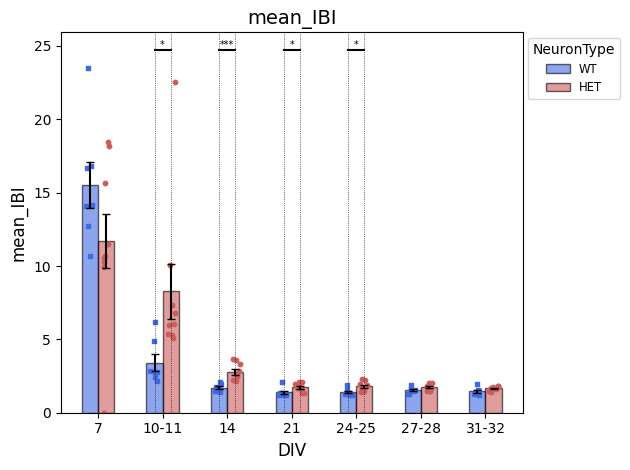

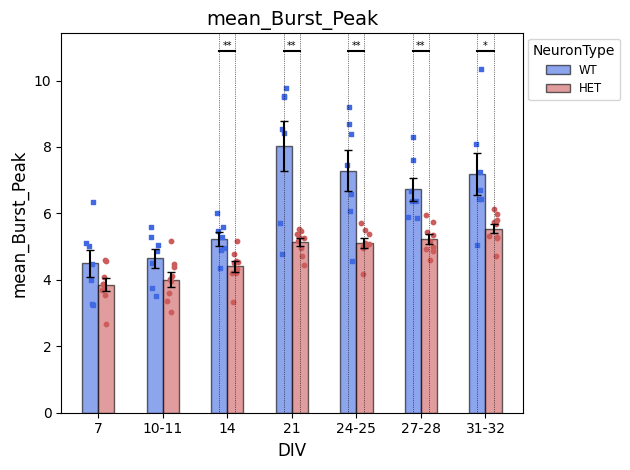

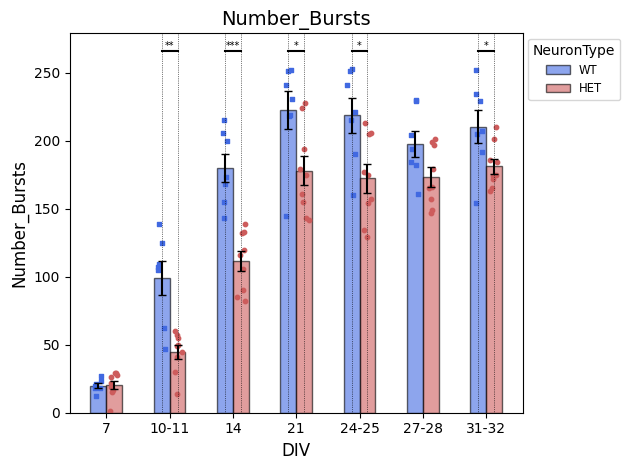

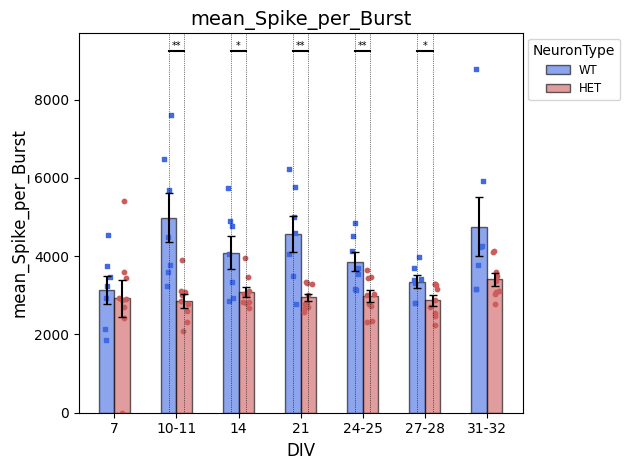

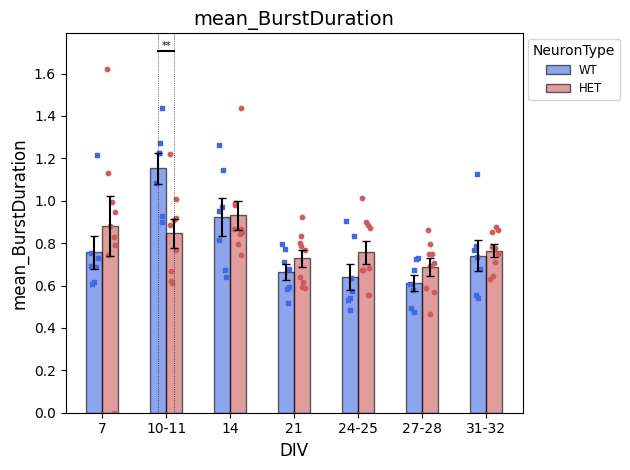

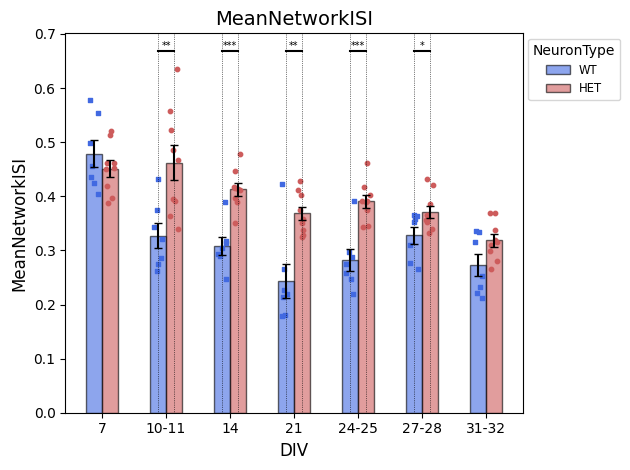

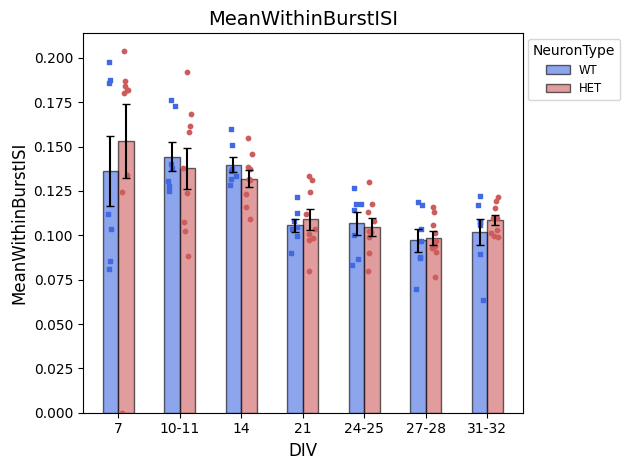

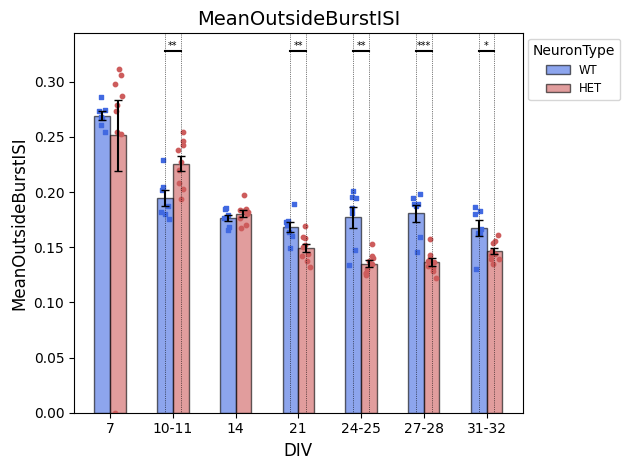

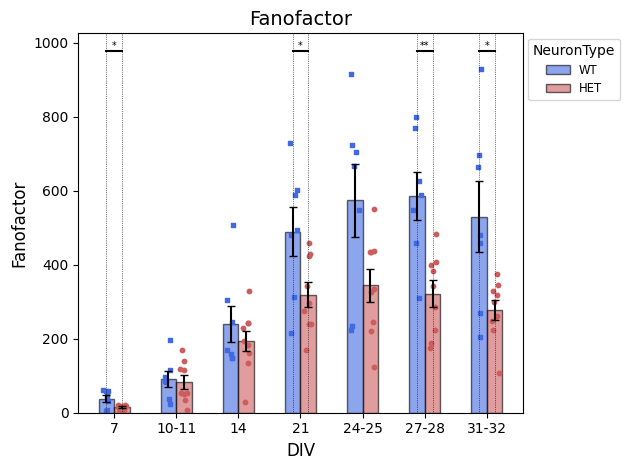

In [15]:
output_types = ['mean_IBI'
    , 'mean_Burst_Peak',  'Number_Bursts',
       'mean_Spike_per_Burst',
     'mean_BurstDuration','MeanNetworkISI',  'MeanWithinBurstISI',
        'MeanOutsideBurstISI','Fanofactor']





dirpath = '/home/mmp/Documents/ADNP_JUNE2024/ADNP_combined_2and3/'

for output_type in output_types:
    total_genotypes = len(unique_genotypes)
    #output_type='Number_Bursts'
    # Print the number of unique genotypes
    print(f"Number of unique Genotypes: {total_genotypes}")

    # Initialize output arrays for each unique genotype
    output_arrays = {genotype: [] for genotype in unique_genotypes}
    chip_arrays = {genotype: [] for genotype in unique_genotypes}
    well_arrays = {genotype: [] for genotype in unique_genotypes}
    print(unique_genotypes)
    # Fill data from data frame
    for i in div:
        for genotype in unique_genotypes:
            temp_df = df.loc[(df['DIV'] == i) &
                            (df['NeuronType'].str.strip() == genotype)
                            ]
            output_arrays[genotype].append(np.array(temp_df[output_type]))
            chip_arrays[genotype].append(np.array(temp_df['Chip_ID']))
            well_arrays[genotype].append(np.array(temp_df['Well']))
    #print(df)
    # Adjust bar width and gap between them
    bar_width = 0.25  # Adjust as necessary for your specific plot
    gap_between_bars = 0  # Adjust the gap between bars within a group

    # Calculate the total width for all bars in a group
    total_bar_group_width = total_genotypes * bar_width + (total_genotypes - 1) * gap_between_bars

    # Create x-coordinates of bars for each genotype group
    x_genotype = {genotype: [] for genotype in unique_genotypes}
    base_x_coordinate = np.arange(len(div))  # Base x-coordinates for each group
    offset = (total_genotypes * bar_width + (total_genotypes - 1) * gap_between_bars) / 2
    centered_x = base_x_coordinate - offset + bar_width / 2
    for i, genotype in enumerate(unique_genotypes):
        x_genotype[genotype] = centered_x + i * (bar_width + gap_between_bars)



    # Initialize plot
    fig, ax = plt.subplots()
    # Generate a list of distinct colors based on the number of genotypes
    #colors = [plt.colormaps['Set1'](i) for i in np.linspace(0, 1, len(unique_genotypes))]# Using a colormap to generate colors
    #colors2 = [plt.colormaps['Set2'](i) for i in np.linspace(0, 1, len(unique_genotypes))]#
    # marker_shapes = ['^', 's', 'v', 'D', '+', 'x', '*', 'H', '8']
    # marker_chips={chip:marker_shapes[idx] for idx, chip in enumerate(track_chips)}
    # Plot data for each genotype
    mean_data_all ={}
    yerr_data_all = {}
    n_data_all={}
    #breakpoint()
    #pdb.set_trace()
    for i,genotype in enumerate(unique_genotypes):
        #breakpoint()
        y_data = output_arrays[genotype]
        chipy_data = chip_arrays[genotype]
        welly_data = well_arrays[genotype]
        #print("type: ",type(genotype))
        # Calculate statistics
        mean_data = [np.mean([n for n in yi if np.isfinite(n)]) for yi in y_data]
        yerr_data = [np.std([n for n in yi if np.isfinite(n)], ddof=1)/np.sqrt(np.size(yi)) for yi in y_data]
        n_data = [len(yi) for yi in y_data]
        # Store statistics in dictionaries
        mean_data_all[genotype] = mean_data
        yerr_data_all[genotype] = yerr_data
        n_data_all[genotype] = n_data
        
            
        # Plot bars
        #transparency value 
        alpha_value = 0.5
        ax.bar(x_genotype[genotype], mean_data, yerr=yerr_data, capsize=3, width=bar_width, color=colors[i], edgecolor='black', ecolor='black', label=genotype,alpha=0.6)

        #pdb.set_trace()
        # Plot scatter points
        #breakpoint()
        for j in range(len(x_genotype[genotype])):
            #pdb.set_trace()
            # ax.scatter(x_genotype[genotype][j] + np.zeros(y_data[j].size), y_data[j], s=20,color=colors2[i],marker=marker_chips[chipy_data[j]+str(welly_data[j])] if chipy_data[j]+str(welly_data[j]) in track_chips else 'o')
    # Concatenate corresponding elements from chipy_data[j] and welly_data[j]
            combined_data = [str(chip)+ str(well) for chip, well in zip(chipy_data[j], welly_data[j])]

            # # Check if the concatenated string is in track_chips, and set the marker accordingly
            # markers = [marker_chips.get(chipwell, 'o') for chipwell in combined_data]
            # #marker_chips[combined_data[0]] if combined_data[0] in track_chips else 'o'

            # Use the marker in the scatter plot
            jitter_amount=0.07
            for k in range(len(y_data[j])):
                #pdb.set_trace()
                ax.scatter(
                    x_genotype[genotype][j] + np.random.uniform(-jitter_amount, jitter_amount, 1),
                    y_data[j][k],
                    s=10,
                    color=colors[i],
                    marker=markers[i]
                        )


    # # Calculate maximum y-value for plotting significance
    # max_y = max([max(data) for data in output_arrays.values() if data.size > 0])
    # increment = max_y * 0.1  # Increment to adjust y-position for significance markers

    #Perform and plot t-tests between all pairs of genotype
    #pdb.set_trace()
    for i in range(len(base_x_coordinate)):
        #maxim = max([max( output_arrays[genotype][i] )for genotype in unique_genotypes])
        maxim = max(max(array) for genotype_arrays in output_arrays.values() for array in genotype_arrays)
        count = 1
        p_values = []
        for j, genotype1 in enumerate(unique_genotypes):
            for k, genotype2 in enumerate(unique_genotypes):
                if j < k:
                    #pdb.set_trace()
                    #print("mean_data_all",mean_data_all[genotype1])
                    #print("type:",type(genotype1))
                    mean1, sem1, n1 = mean_data_all[genotype1][i], yerr_data_all[genotype1][i], n_data_all[genotype1][i]
                    mean2, sem2, n2 = mean_data_all[genotype2][i], yerr_data_all[genotype2][i], n_data_all[genotype2][i]
                    #t_stat, p_value = stats.ttest_ind_from_stats(mean1, sem1, n1, mean2, sem2, n2)
                    sed = sqrt(sem1**2.0 + sem2**2.0)
                    t_stat = (mean1 - mean2) / sed
                    # degrees of freedom
                    degreef = n1+n2 - 2
                    alpha=0.05
                    # calculate the critical value
                    cv = stats.t.ppf(1.0 - alpha, degreef)
                    # calculate the p-vallue
                    p_value = (1.0 - stats.t.cdf(abs(t_stat), degreef)) * 2.0
                    p_values.append([mean1,sem1,mean2,sem2,p_value])

                    # Plot significance
                    #maxim = max(np.max(output_arrays[genotype1][i]), np.max(output_arrays[genotype2][i]))
                    x1, x2 = x_genotype[genotype1][i], x_genotype[genotype2][i]
                    
                    sign = "***" if p_value <= 0.001 else "**" if p_value <= 0.01 else "*" if p_value <= 0.05 else "ns"
                    if not sign =='ns':
                        ax.plot([x1, x2], [maxim + 0.05*maxim*(count)] * 2, 'k', linewidth=1.5)
                        ax.text((x1 + x2) / 2, maxim +0.05*maxim*(count), sign, ha='center', va='bottom', fontsize=7)
                        ax.axvline(x1,color='black',linestyle=':',linewidth=0.5)
                        ax.axvline(x2,color='black',linestyle=':',linewidth=0.5)
                    count = count +1

                    


   # Adjustments for plot aesthetics
    plt.title(f"{output_type}", fontsize=14)
    plt.xlabel('DIV', fontsize=12)
    plt.ylabel(f"{output_type}", fontsize=12)
    plt.xticks(base_x_coordinate, div, fontsize=10)
    plt.legend(title='NeuronType', loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
    plt.tight_layout()  # Adjust layout to prevent clipping of ylabel
    #plt.legend(title='NeuronType',loc='upper right', fontsize='x-small', handlelength=2, handletextpad=2, handleheight=2,bbox_to_anchor=(1.0, 1))
    import os 
    
    if not os.path.exists(dirpath):
            os.makedirs(dirpath)
    plt.savefig(f"{dirpath}/{output_type}.svg",dpi=300,format='svg')

In [9]:
from matplotlib.backends.backend_pdf import PdfPages

# Create a PDF file to save all the plots
with PdfPages(f"{dirpath}/all_plots.pdf") as pdf:
    for output_type in output_types:
        total_genotypes = len(unique_genotypes)
        
        # Print the number of unique genotypes
        print(f"Number of unique Genotypes: {total_genotypes}")

        # Initialize output arrays for each unique genotype
        output_arrays = {genotype: [] for genotype in unique_genotypes}
        chip_arrays = {genotype: [] for genotype in unique_genotypes}
        well_arrays = {genotype: [] for genotype in unique_genotypes}
        print(unique_genotypes)
        
        # Fill data from data frame
        for i in div:
            for genotype in unique_genotypes:
                temp_df = df.loc[(df['DIV'] == i) & (df['NeuronType'].str.strip() == genotype)]
                output_arrays[genotype].append(np.array(temp_df[output_type]))
                chip_arrays[genotype].append(np.array(temp_df['Chip_ID']))
                well_arrays[genotype].append(np.array(temp_df['Well']))
        
        # Adjust bar width and gap between them
        bar_width = 0.25  # Adjust as necessary for your specific plot
        gap_between_bars = 0  # Adjust the gap between bars within a group

        # Calculate the total width for all bars in a group
        total_bar_group_width = total_genotypes * bar_width + (total_genotypes - 1) * gap_between_bars

        # Create x-coordinates of bars for each genotype group
        x_genotype = {genotype: [] for genotype in unique_genotypes}
        base_x_coordinate = np.arange(len(div))  # Base x-coordinates for each group
        offset = (total_genotypes * bar_width + (total_genotypes - 1) * gap_between_bars) / 2
        centered_x = base_x_coordinate - offset + bar_width / 2
        for i, genotype in enumerate(unique_genotypes):
            x_genotype[genotype] = centered_x + i * (bar_width + gap_between_bars)

        # Initialize plot
        fig, ax = plt.subplots(figsize=(8, 6))

        mean_data_all = {}
        yerr_data_all = {}
        n_data_all = {}

        for i, genotype in enumerate(unique_genotypes):
            y_data = output_arrays[genotype]
            chipy_data = chip_arrays[genotype]
            welly_data = well_arrays[genotype]

            # Calculate statistics
            mean_data = [np.mean([n for n in yi if np.isfinite(n)]) for yi in y_data]
            yerr_data = [np.std([n for n in yi if np.isfinite(n)], ddof=1)/np.sqrt(np.size(yi)) for yi in y_data]
            n_data = [len(yi) for yi in y_data]

            # Store statistics in dictionaries
            mean_data_all[genotype] = mean_data
            yerr_data_all[genotype] = yerr_data
            n_data_all[genotype] = n_data

            # Plot bars
            ax.bar(x_genotype[genotype], mean_data, yerr=yerr_data, capsize=3, width=bar_width, color=colors[i], edgecolor='black', ecolor='black', label=genotype, alpha=0.6)

            # Plot scatter points
            for j in range(len(x_genotype[genotype])):
                combined_data = [str(chip)+str(well) for chip, well in zip(chipy_data[j], welly_data[j])]
                jitter_amount = 0.07
                for k in range(len(y_data[j])):
                    ax.scatter(
                        x_genotype[genotype][j] + np.random.uniform(-jitter_amount, jitter_amount, 1),
                        y_data[j][k],
                        s=10,
                        color=colors[i],
                        marker='o'
                    )
        #Perform and plot t-tests between all pairs of genotype
    #pdb.set_trace()
        for i in range(len(base_x_coordinate)):
            #maxim = max([max( output_arrays[genotype][i] )for genotype in unique_genotypes])
            maxim = max(max(array) for genotype_arrays in output_arrays.values() for array in genotype_arrays)
            count = 1
            p_values = []
            for j, genotype1 in enumerate(unique_genotypes):
                for k, genotype2 in enumerate(unique_genotypes):
                    if j < k:
                        #pdb.set_trace()
                        #print("mean_data_all",mean_data_all[genotype1])
                        #print("type:",type(genotype1))
                        mean1, sem1, n1 = mean_data_all[genotype1][i], yerr_data_all[genotype1][i], n_data_all[genotype1][i]
                        mean2, sem2, n2 = mean_data_all[genotype2][i], yerr_data_all[genotype2][i], n_data_all[genotype2][i]
                        #t_stat, p_value = stats.ttest_ind_from_stats(mean1, sem1, n1, mean2, sem2, n2)
                        sed = sqrt(sem1**2.0 + sem2**2.0)
                        t_stat = (mean1 - mean2) / sed
                        # degrees of freedom
                        degreef = n1+n2 - 2
                        alpha=0.05
                        # calculate the critical value
                        cv = stats.t.ppf(1.0 - alpha, degreef)
                        # calculate the p-vallue
                        p_value = (1.0 - stats.t.cdf(abs(t_stat), degreef)) * 2.0
                        p_values.append([mean1,sem1,mean2,sem2,p_value])

                        # Plot significance
                        #maxim = max(np.max(output_arrays[genotype1][i]), np.max(output_arrays[genotype2][i]))
                        x1, x2 = x_genotype[genotype1][i], x_genotype[genotype2][i]
                        
                        sign = "***" if p_value <= 0.001 else "**" if p_value <= 0.01 else "*" if p_value <= 0.05 else "ns"
                        if not sign =='ns':
                            ax.plot([x1, x2], [maxim + 0.05*maxim*(count)] * 2, 'k', linewidth=1.5)
                            ax.text((x1 + x2) / 2, maxim +0.05*maxim*(count), sign, ha='center', va='bottom', fontsize=7)
                            ax.axvline(x1,color='black',linestyle=':',linewidth=0.5)
                            ax.axvline(x2,color='black',linestyle=':',linewidth=0.5)
                        count = count +1

                    
        # Adjustments for plot aesthetics
        plt.title(f"{output_type}", fontsize=14)
        plt.xlabel('DIV', fontsize=12)
        plt.ylabel(f"{output_type}", fontsize=12)
        plt.xticks(base_x_coordinate, div, fontsize=10)
        plt.legend(title='NeuronType', loc='upper left', bbox_to_anchor=(1, 1), fontsize='small')
        plt.tight_layout()  # Adjust layout to prevent clipping of ylabel

        # Save the current figure to the PDF
        pdf.savefig(fig)
        plt.close(fig)

print("All plots have been saved to a single PDF file.")

Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
Number of unique Genotypes: 2
['WT' 'HET']
All plots have been saved to a single PDF file.
